<a href="https://colab.research.google.com/github/rombolaagustin/ml-practice/blob/main/neural_network_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Celsius: [-40. -10.   0.   8.  15.  22.  38.]
Farenheit: [-40.   14.   32.   46.4  59.   71.6 100.4]
Training...
Modelo entrenado
Predicting...
1/1 [==============================] - 0s 88ms/step
Result [ 0 10 40] ºC --> [[ 31.976072]
 [ 49.978104]
 [103.98419 ]] ºF
Print weights
[array([[1.8002028]], dtype=float32), array([31.976072], dtype=float32)]
Training new complex model...


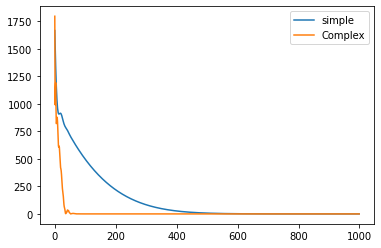

New weights --> l1 [array([[0.36045885, 0.17500457, 0.50699246]], dtype=float32), array([3.5864136, 1.4217646, 3.6144426], dtype=float32)] l2: [array([[-0.28441054, -1.1459805 ,  0.37675256],
       [ 0.37828615, -0.26562545, -0.3443907 ],
       [-0.00137438, -0.99568075, -0.8796079 ]], dtype=float32), array([-3.1542728, -3.5811002, -3.5181818], dtype=float32)] output: [array([[-1.6683786],
       [-1.4066552],
       [-1.0304928]], dtype=float32), array([3.4986348], dtype=float32)]
1/1 [==============================] - 0s 59ms/step
Result [ 0 10 40] ºC --> [[ 32.     ]
 [ 50.     ]
 [104.00001]] ºF


In [ ]:

### Se intenta genera una red neuronal que transforme de celsius a farenheit

celsius = np.array([-40, -10, 0, 8, 15 ,22, 38], dtype=float)
farenheit = celsius*(9/5) + 32

print(f"Celsius: {celsius}")
print(f"Farenheit: {farenheit}")

# Se crea una capa y con una sola neurona

layer = tf.keras.layers.Dense(units=1, input_shape=[1]) # Una capa y una neurona por capa
model = tf.keras.Sequential([layer])

# Compila el modelo utilizando el optimizador de adams
# La función de perdida es mean_squared_error

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.1), #Tasa de aprendizaje 
    loss='mean_squared_error' # Error function
)

print('Training...')
historial = model.fit(celsius, farenheit, epochs=1000, verbose=False)

print("Modelo entrenado")

# plt.plot(historial.history['loss'])
# plt.show()

print('Predicting...')

#result = model.predict(np.linspace(start=-50, stop=50, num=101, endpoint=True))
data = np.array([0, 10, 40])
result = model.predict(data)
print(f"Result {data} ºC --> {result.reshape(-1, 1)} ºF")

print('Print weights')
print(layer.get_weights())

#### AHORA AGREGANDO MAS CAPAS AL MODELO ....

layer_1 = tf.keras.layers.Dense(units=3, input_shape=[1])
layer_2 = tf.keras.layers.Dense(units=3)
output = tf.keras.layers.Dense(units=1)

print('Training new complex model...')
complex_model = tf.keras.Sequential([layer_1, layer_2, output])
complex_model.compile(
    optimizer=tf.keras.optimizers.Adam(0.1), #Tasa de aprendizaje 
    loss='mean_squared_error' # Error function
)
complex_hist = complex_model.fit(celsius, farenheit, epochs=1000, verbose=False)

plt.plot(historial.history['loss'], label='simple')
plt.plot(complex_hist.history['loss'], label='Complex')
plt.legend()
plt.show()

print(f"New weights --> l1 {layer_1.get_weights()} l2: {layer_2.get_weights()} output: {output.get_weights()}")
# En este caso los pesos no tienen tanto sentido como en el modelo lineal...
data = np.array([0, 10, 40])
result = complex_model.predict(data)
print(f"Result {data} ºC --> {result.reshape(-1, 1)} ºF")